# My Project Notebook

**Rachel King**

***

## **Table of Contents**

- [Introduction](#introduction)
- [Importing of Modules](#importing-of-modules)
- [Classifying the Variables](#classiying-the-variables)
- [Summary of Each Variable](#summary-of-each-variable)
- [Individual Plots of the Variables](#individual-plots-of-the-variables)
- [Correlation Plots Displaying Relationships Between the Variables](#correlation-plots-displaying-relationships-between-the-variables)
    - [Scatter Plots](#scatter-plots)
    - [Pair Plots](#pair-plots)
- [Discussion](#discussion)
- [References](#references)

## **Introduction** ##

The Iris dataset is one of the most well-known data sets in relation to pattern recognition.

The dataset was created in 1936 by R.A Fisher. It contains 3 classes, with each class referencing a type of iris plant. There are 50 instances of each class, with 150 instances in total.

Each class has 4 attributes, or variables, which are:

- Sepal length in centimetres
- Sepal width in centimetres
- Petal length in centimetres
- Petal width in centimetres

One class (Iris-setosa) is linearly separable from the other two, while the latter (Iris-versicolor and Iris-virginica) are not linearly separable from each other. [[1]](#1)

An image of the three Iris plant species referred to in the dataset can be seen below:

![Iris Plants](https://editor.analyticsvidhya.com/uploads/51518iris%20img1.png)

## Importing of Modules ##

Here we import packages we rely on to aid analysis and visualisation of the data:

- Pandas (a Python library used for working with datasets and is used to analyse, explore and manipulate data) [[2]](#2)
- Numpy (a Python library used for working with arrays) [[3]](#3)
- Matplotlib (a Python library used for plotting data and for visualisation) [[4]](#4)
- Tabulate (a Python package used to print tabular data in nicely formatted tables) [[5]](#5)
- Seaborn (a Python library used for data visualisation - provides informative statistical graphics) [[6]](#6)
- Sys (a Python module that provides functions and variables that are used to manipulate parts of the Python runtime environment) [[7]](#7)
- Plotnine (Plotnine is an implementation of a grammar of graphics in Python, based on ggplot2. It allows plots to be created in order to visualise the data) [[8]](#8)

These modules are very useful as they enable data to be analysed, structured into readable and well-formatted tables & graphs and provide control over the input and output of the program.
This is very important when trying to create a clear picture of the story of the data and what it represents.

In [1]:
# to import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tabulate import tabulate
import seaborn as sns
import sys
from plotnine import ggplot, aes, geom_line, geom_bar, geom_point, labs, coord_flip, theme_xkcd, geom_smooth

The dataset is imported into the workspace directly from its URL.
It is then stored as a variable iris so it can be called to analyse and visualise the data it contains.

In [2]:
# importing the dataset
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
# using the attribute information as the column names
col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Class']
iris =  pd.read_csv(csv_url, names = col_names)

## Classifying the Variables

In [3]:
# to display the data type associated with each variable in the dataset
iris.dtypes

Sepal_Length    float64
Sepal_Width     float64
Petal_Length    float64
Petal_Width     float64
Class            object
dtype: object

In [4]:
# to count the number of instances of each class/species of Iris plant
iris['Class'].value_counts()

Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

- There are 50 instances of each class/species of Iris plant
- Sepal Length is the largest variable, with a mean of 5.8, while Petal Width is the smallest with a mean of 1.2.
- The largest Sepal Lengths occur in the Iris virginica species while the smallest occur in the Iris setosa.
- However, Iris setosa represents the largest Sepal Widths.
- For the petal characteristics then, Petal Length and Petal Width are both largest in the Iris virginica species, and smallest in the Iris setosa species.
- Petal Length is the variable with the widest spread of data, with a standard deviation of 1.7 and a range from a minimum of 1 to a maximum of 6.9.
- Sepal Width then is the variable with the smallest spread of data, as all three species of Iris plant have similar sepal widths.

## Summary of Each Variable ##

A number of tables were created which statistically summarise the dataset as a whole, as well as statistical summaries of each of the three classes of iris plant.

A table of statistics for each variable can be seen below:

In [5]:
# Summary of each Variable
print("Table 1 - Iris Dataset Statistics")
iris_stats = iris.agg({'Sepal_Length': ['mean', 'min', 'max', 'std'],
                           'Sepal_Width': ['mean', 'min', 'max', 'std'],
                           'Petal_Length': ['mean', 'min', 'max', 'std'],
                           'Petal_Width': ['mean', 'min', 'max', 'std']})
print(tabulate(iris_stats, headers = ["Stat", "Sepal_Length (cm)", "Sepal_Width (cm)", "Petal_Length (cm)", "Petal_Width (cm)"], tablefmt='grid', stralign='center'))
print('\n')

Table 1 - Iris Dataset Statistics
+--------+---------------------+--------------------+---------------------+--------------------+
|  Stat  |   Sepal_Length (cm) |   Sepal_Width (cm) |   Petal_Length (cm) |   Petal_Width (cm) |
+========+=====================+====================+=====================+====================+
|  mean  |            5.84333  |           3.054    |             3.75867 |           1.19867  |
+--------+---------------------+--------------------+---------------------+--------------------+
|  min   |            4.3      |           2        |             1       |           0.1      |
+--------+---------------------+--------------------+---------------------+--------------------+
|  max   |            7.9      |           4.4      |             6.9     |           2.5      |
+--------+---------------------+--------------------+---------------------+--------------------+
|  std   |            0.828066 |           0.433594 |             1.76442 |           0.76316

Further tables of statistics with the dataset broken down by Iris plant species can be seen below:

In [6]:
# Sepal Length Statistics
print("Table 2 - Iris Dataset Sepal Length Statistics")
table_of_data = iris.groupby('Class').agg({'Sepal_Length': ['mean', 'min', 'max', 'std']})
table_of_data.reset_index(inplace=False)
print(tabulate(table_of_data, headers = ["Class", "Mean (cm)", "Min (cm)", "Max (cm)", "S.D. (cm)"], tablefmt='grid', stralign='center'))
print('\n')

# Sepal Width Statistics
print("Table 3 - Iris Dataset Sepal Width Statistics")
table_of_data = iris.groupby('Class').agg({'Sepal_Width': ['mean', 'min', 'max', 'std']})
table_of_data.reset_index(inplace=False)
print(tabulate(table_of_data, headers = ["Class", "Mean (cm)", "Min (cm)", "Max (cm)", "S.D. (cm)"], tablefmt='grid', stralign='center'))
print('\n')

# Petal Length Statistics
print("Table 4 - Iris Dataset Petal Length Statistics")
table_of_data = iris.groupby('Class').agg({'Petal_Length': ['mean', 'min', 'max', 'std']})
table_of_data.reset_index(inplace=False)
print(tabulate(table_of_data, headers = ["Class", "Mean (cm)", "Min (cm)", "Max (cm)", "S.D. (cm)"], tablefmt='grid', stralign='center'))
print('\n')

# Petal Width Statistics
print("Table 5 - Iris Dataset Petal Width Statistics")
table_of_data = iris.groupby('Class').agg({'Petal_Width': ['mean', 'min', 'max', 'std']})
table_of_data.reset_index(inplace=False)
print(tabulate(table_of_data, headers = ["Class", "Mean (cm)", "Min (cm)", "Max (cm)", "S.D. (cm)"], tablefmt='grid', stralign='center'))
print("\n")

# https://jamesrledoux.com/code/group-by-aggregate-panda

Table 2 - Iris Dataset Sepal Length Statistics
+-----------------+-------------+------------+------------+-------------+
|      Class      |   Mean (cm) |   Min (cm) |   Max (cm) |   S.D. (cm) |
+=================+=============+============+============+=============+
|   Iris-setosa   |       5.006 |        4.3 |        5.8 |    0.35249  |
+-----------------+-------------+------------+------------+-------------+
| Iris-versicolor |       5.936 |        4.9 |        7   |    0.516171 |
+-----------------+-------------+------------+------------+-------------+
| Iris-virginica  |       6.588 |        4.9 |        7.9 |    0.63588  |
+-----------------+-------------+------------+------------+-------------+


Table 3 - Iris Dataset Sepal Width Statistics
+-----------------+-------------+------------+------------+-------------+
|      Class      |   Mean (cm) |   Min (cm) |   Max (cm) |   S.D. (cm) |
+=================+=============+============+============+=============+
|   Iris-setosa  

In [7]:
# calculating mean, mode, median and skewness values for the variables
#https://stackoverflow.com/questions/21082671/find-and-select-the-most-frequent-data-of-column-in-pandas-dataframe

mean_sepallength = iris['Sepal_Length'].mean().round(2)      # to calculate the mean value of the measuring variables
mean_sepalwidth = iris['Sepal_Width'].mean().round(2)                        
mean_petallength = iris['Petal_Length'].mean().round(2)
mean_petalwidth = iris['Petal_Width'].mean().round(2)                         

mode_sepallength = iris.mode()['Sepal_Length'][0]       # to calculate the mode value of the measuring variables
mode_sepalwidth = iris.mode()['Sepal_Width'][0]                                  
mode_petallength = iris.mode()['Petal_Length'][0] 
mode_petalwidth = iris.mode()['Petal_Width'][0]                         

median_sepallength = iris['Sepal_Length'].median()          # to calculate the median value of the measuring variables
median_sepalwidth = iris['Sepal_Width'].median()                                 
median_petallength = iris['Petal_Length'].median()
median_petalwidth = iris['Petal_Width'].median()                        

skew_sepallength = iris['Sepal_Length'].skew().round(2)      # to calculate and print the skewness of the variablea
skew_sepalwidth = iris['Sepal_Width'].skew().round(2)               
skew_petallength = iris['Petal_Length'].skew().round(2)              
skew_petalwidth = iris['Petal_Width'].skew().round(2)                

In [8]:
# to print the statistics for each variable
print('Sepal Length:')                        
print("Mean =", mean_sepallength)             
print("Mode =", mode_sepallength)
print("Median =", median_sepallength)
print("Skew =", skew_sepallength)
print("\n")

print('Sepal Width:')                        
print("Mean =", mean_sepalwidth)             
print("Mode =", mode_sepalwidth)
print("Median =", median_sepalwidth)
print("Skew =", skew_sepalwidth)
print("\n")

print('Petal Length:')                        
print("Mean =", mean_petallength)             
print("Mode =", mode_petallength)
print("Median =", median_petallength)
print("Skew =", skew_petallength)
print("\n")

print('Petal Width:')                        
print("Mean =", mean_petalwidth)             
print("Mode =", mode_petalwidth)
print("Median =", median_petalwidth)
print("Skew =", skew_petalwidth)
print("\n")

correlation = iris.select_dtypes(exclude=[object])    # to create a dataframe to exclude the variables of datatype "object"
print('Correlation:')
correlation.corr().round(2) 
# https://datascience.stackexchange.com/questions/121618/corr-is-giving-an-error-please-help-out-of-this-problem-and-tell-me-what-is-t

Sepal Length:
Mean = 5.84
Mode = 5.0
Median = 5.8
Skew = 0.31


Sepal Width:
Mean = 3.05
Mode = 3.0
Median = 3.0
Skew = 0.33


Petal Length:
Mean = 3.76
Mode = 1.5
Median = 4.35
Skew = -0.27


Petal Width:
Mean = 1.2
Mode = 0.2
Median = 1.3
Skew = -0.1


Correlation:


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Sepal_Length,1.00,-0.11,0.87,0.82
Sepal_Width,-0.11,1.00,-0.42,-0.36
Petal_Length,0.87,-0.42,1.00,0.96
Petal_Width,0.82,-0.36,0.96,1.00


There is strong positive correlation between the variable sepal length and both the petal variables - the flowers with the smallest sepal lengths have the smallest petal lengths and widths, and vice versa.

Meanwhile, there is a negative correlation between sepal width and the two petal variables - flowers with the largest sepal widths will have the smallest petal characteristics.

The strongest correlation is evident between the two petal variables. The correlation value obtained of 0.96 indicates an extremely strong positive correlation between the two variables.

The above tables describe the mean, minimum, maximum and standard deviation of the four measuring variables in the dataset.

Table 1 displays the above statistics for the dataset as a whole, while tables 2-5 describe the statistics for each variable for each class of Iris plant.

- The mean is a number representing the centre of a collection of numbers, it gives a value which represents the average value for a particular collection of numbers.
- The standard deviation is a summary measure of the differences of each value in the data from the mean.
- The minimum and maximum values represent the lowest and highest values observed in the collection of values, giving an indication of the spread of data.
- The mode is the value that appears most frequently in a dataset.
- The median is the value in the middle of the dataset.
- The skewness is a measure of the asymetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images. A distribution can have right (or positive), left (or negative), or zero skewness. [[9]](#9)

![Distribution and Skewness](https://i0.wp.com/upload.wikimedia.org/wikipedia/commons/c/cc/Relationship_between_mean_and_median_under_different_skewness.png?w=584&ssl=1)

From the mean, median , mode and skewness data above, we can get an indication of the symmetrical nature of the distribution of the variables.
- For the two sepal variables, the mean, median and mode are very similar which indicates that the data is quite symmetrical.
- The skewness values of approximately 0.3 further supports the assessment that the data is symmetrical (values between -0.5 & 0.5 indicate symmetry).
- For the petal variables, the skewness values are quite close to 0, which may indicate the data is symmetrical. However, the mode value is quite different from the mean and median values for both of these variables, indicating that the data is overall not symmetrically distributed. [[10]](#10)

https://www.analyticsvidhya.com/blog/2021/05/shape-of-data-skewness-and-kurtosis/#:~:text=If%20the%20skewness%20is%20between,the%20data%20are%20extremely%20skewed.

## Individual Plots of the Variables

### Histograms

Histograms are most often used in Python to visualise the distribution of the variables in a dataset.

From the histograms, an inference on what kind of distribution the variable follows can be drawn. Modules such as "Fitter" can also be used on th data to best fit the data for each variable to a type of distribution.

For this project, I am going to look at each of the four variables - Petal Length, Petal Width, Sepal Length and Sepal Width - by species, and try to establish some type of inference about the distribution of the data for each of the three species across the four measuring variables mentioned above.

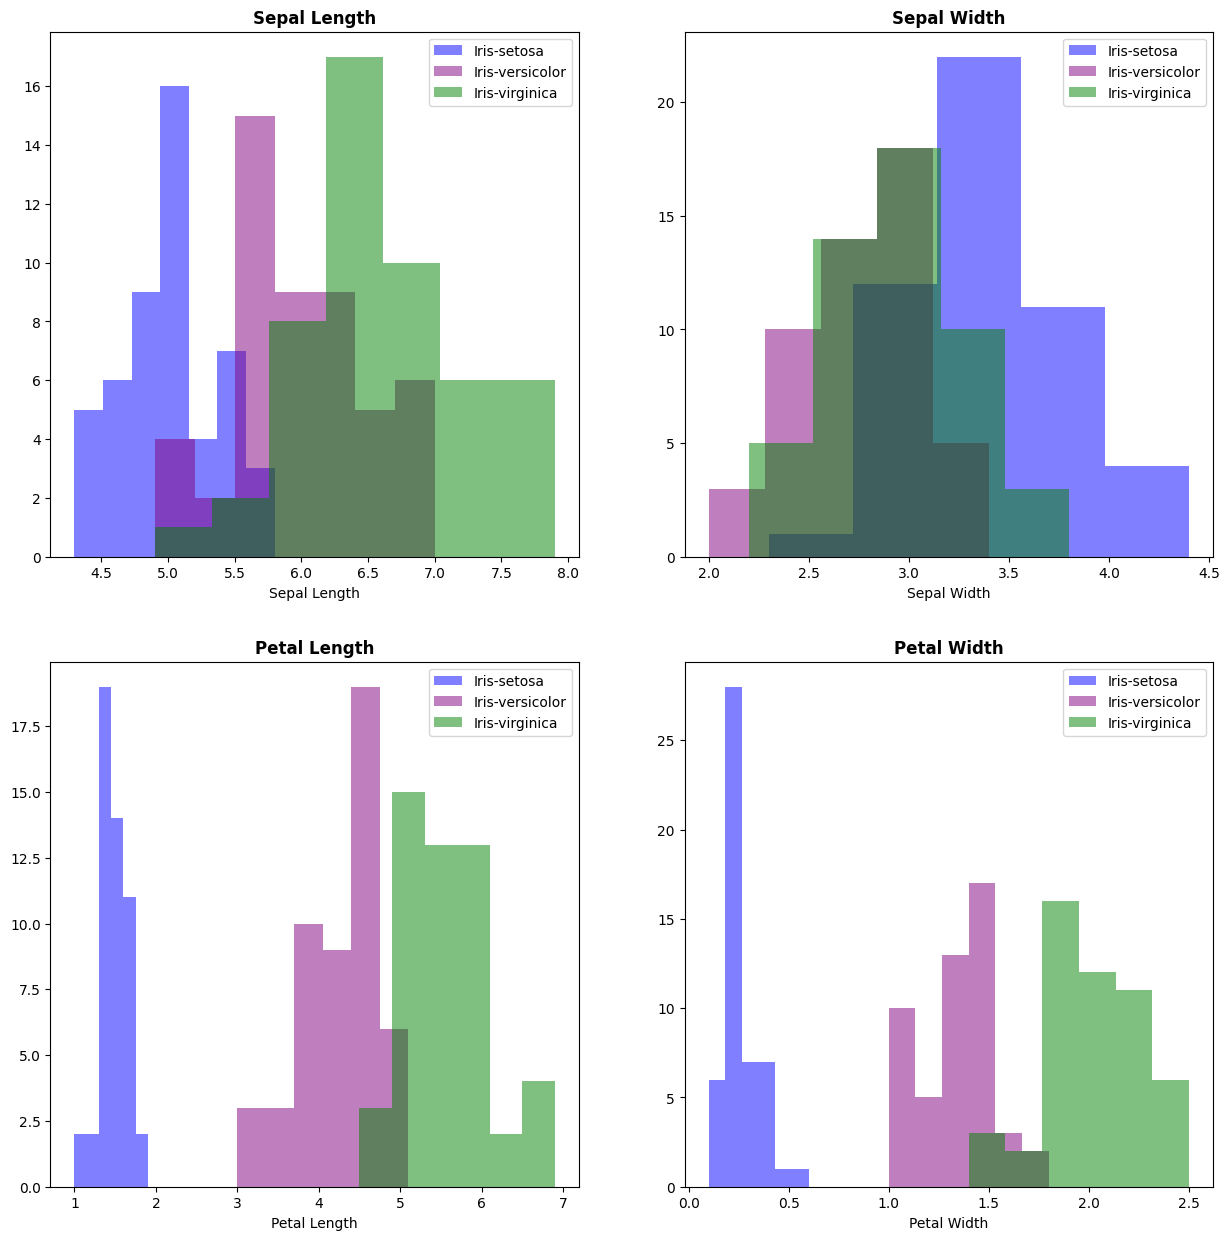

In [9]:
fig, axes = plt.subplots(2,2, figsize = (15,15))            # subplots created so the histograms will display together in a 2x2 layout
setosa = iris[iris.Class == "Iris-setosa"]                  # new variable created for each class of Iris plant
versicolor = iris[iris.Class == "Iris-versicolor"]
virginica = iris[iris.Class == "Iris-virginica"]

# sepal length histogram 
axes[0,0].set_title("Sepal Length", fontweight='bold')      # to plot the data for the plot in the top left of the 2x2 grid of subplots
axes[0,0].set(xlabel='Sepal Length')
axes[0,0].hist(setosa['Sepal_Length'], bins=7, alpha=0.5, label="Iris-setosa", color='blue')            # creates a histogram for setosa species
axes[0,0].hist(versicolor['Sepal_Length'], bins=7, alpha=0.5, label="Iris-versicolor", color='purple')  # creates a histogram for versicolor species
axes[0,0].hist(virginica['Sepal_Length'], bins=7, alpha=0.5, label="Iris-virginica", color='green')    # creates a histogram for virginica species
axes[0,0].legend(loc='upper right')                         # to set the location of the legend to be in the upper right corner
    
# sepal width histogram 
axes[0,1].set_title("Sepal Width", fontweight='bold')       # to plot the data for the plot in the top right of the 2x2 grid of subplots
axes[0,1].set(xlabel='Sepal Width')
axes[0,1].hist(setosa['Sepal_Width'], bins=5, alpha=0.5, label="Iris-setosa", color='blue')
axes[0,1].hist(versicolor['Sepal_Width'], bins=5, alpha=0.5, label="Iris-versicolor", color='purple')
axes[0,1].hist(virginica['Sepal_Width'], bins=5, alpha=0.5, label="Iris-virginica", color='green')
axes[0,1].legend(loc='upper right');

# petal length histogram 
axes[1,0].set_title("Petal Length", fontweight='bold')      # to plot the data for the plot in the bottom left of the 2x2 grid of subplots
axes[1,0].set(xlabel='Petal Length')
axes[1,0].hist(setosa['Petal_Length'], bins=6, alpha=0.5, label="Iris-setosa", color='blue')
axes[1,0].hist(versicolor['Petal_Length'], bins=6, alpha=0.5, label="Iris-versicolor", color='purple')
axes[1,0].hist(virginica['Petal_Length'], bins=6, alpha=0.5, label="Iris-virginica", color='green')
axes[1,0].legend(loc='upper right');

# petal width histogram 
axes[1,1].set_title("Petal Width", fontweight='bold')       # to plot the data for the plot in the bottom right of the 2x2 grid of subplots
axes[1,1].set(xlabel='Petal Width')
axes[1,1].hist(setosa['Petal_Width'], bins=6, alpha=0.5, label="Iris-setosa", color='blue')
axes[1,1].hist(versicolor['Petal_Width'], bins=6, alpha=0.5, label="Iris-versicolor", color='purple')
axes[1,1].hist(virginica['Petal_Width'], bins=6, alpha=0.5, label="Iris-virginica", color='green')
axes[1,1].legend(loc='upper right');

# https://datavizpyr.com/overlapping-histograms-with-matplotlib-in-python/
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

From the histograms above, Sepal Width appears to be quite normally distributed.
- In a normal distribution, data is symmetrically distributed with no skew.
- The measures of central tendency (mean, mode and median) are the same.
- Most of the values cluster around the central region.
- A well-known example of this type of distribution is often referred to as the Bell Curve. [[11]](#11)

As discussed previosuly, we know from the values for mesn, median and mode obtained earlier in the notebook, that the sepal variables are quite symmetrically distributed.

As we know the mean and standard deviation for sepal width, we can use Numpy Random Generator to genertate 100,000 similar values using normally generated data. This will allow more analysis to be performed on sepal widths of Iris plants all over the world, and not just on the small amount of data recorded in the Iris dataset.

We can do this using all three Iris plant species, as well as further classifying the data by species and generating normally distributed data for sepal width for each fo the three species of Iris plant.


Firstly, if we take the Iris plant data as a whole, we can see from Table 1 above that the mean Sepal Width is 3.054 and the Standard deviation is 0.433594.

To randomly generate data, we will use the Numpy Random Generator rng.

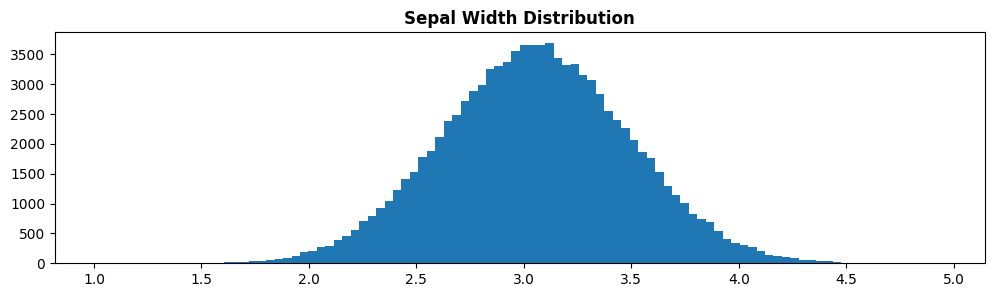

In [10]:
# random generator for Sepal Width
sepal_width_dist = np.random.normal(loc=3.054, scale=0.433594, size=100000)
fig, ax = plt.subplots(figsize=(12,3))

# Plot a histogram
ax.set_title("Sepal Width Distribution", fontweight='bold')
ax.hist(sepal_width_dist, bins=100, density=False);

Similarly, further breaking the data down by species, ramdomly generated data for sepal wifth for each of the three species can be obtained.

For the species Setosa, we can see from Table 3 above that the mean Sepal Width is 3.418 and the Standard deviation is 0.381024.
For the species Versicolor, we can see from Table 3 above that the mean Sepal Width is 2.77 and the Standard deviation is 0.313798.
For the species Virginica, we can see from Table 3 above that the mean Sepal Width is 2.974 and the Standard deviation is 0.322497.

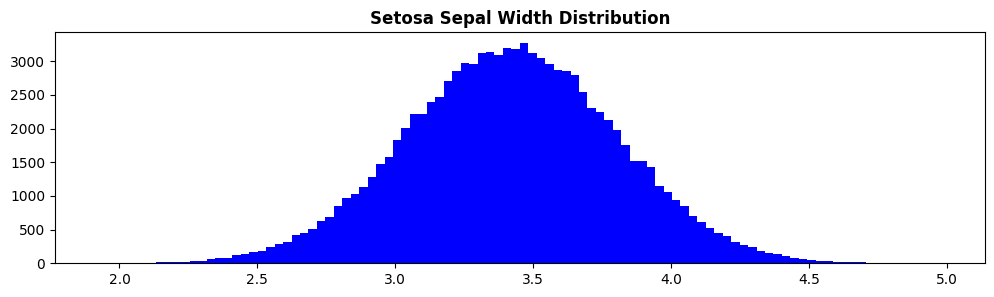

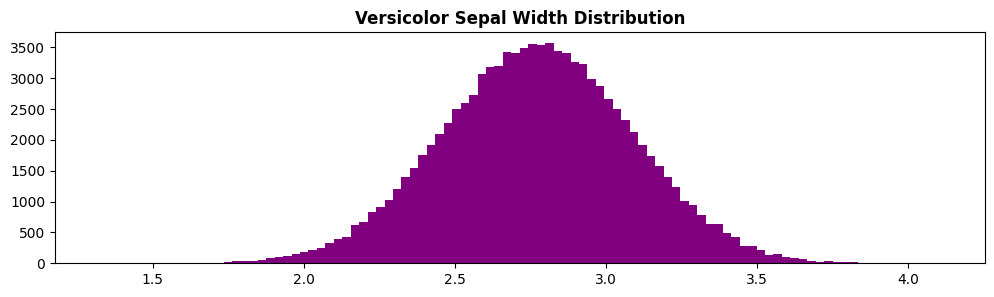

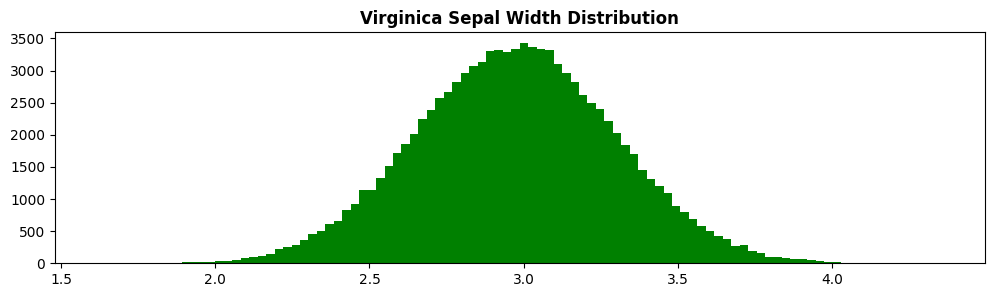

In [11]:
# random generator for Setosa Sepal Width
setosa_sepal_width_dist = np.random.normal(loc=3.418, scale=0.3810274, size=100000)
fig, ax = plt.subplots(figsize=(12,3))

# Plot a histogram
ax.set_title("Setosa Sepal Width Distribution", fontweight='bold')
ax.hist(setosa_sepal_width_dist, bins=100, density=False, color='blue');

# random generator for Versicolor Sepal Width
versicolor_sepal_width_dist = np.random.normal(loc=2.77, scale=0.313798, size=100000)
fig, ax = plt.subplots(figsize=(12,3))

# Plot a histogram
ax.set_title("Versicolor Sepal Width Distribution", fontweight='bold')
ax.hist(versicolor_sepal_width_dist, bins=100, density=False, color='purple');

# random generator for Virginica Sepal Width
virginica_sepal_width_dist = np.random.normal(loc=2.974, scale=0.322497, size=100000)
fig, ax = plt.subplots(figsize=(12,3))

# Plot a histogram
ax.set_title("Virginica Sepal Width Distribution", fontweight='bold')
ax.hist(virginica_sepal_width_dist, bins=100, density=False, color='green');

### Box Plots

Boxplots will give a visual representation of how the data is scattered over the plane. It shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. This means that each value in the boxplot corresponds to an actual observation in the data. [[12]](#12)

I decided to use a box plot as a method of visualising the distribution of the data for the sepal length variable.

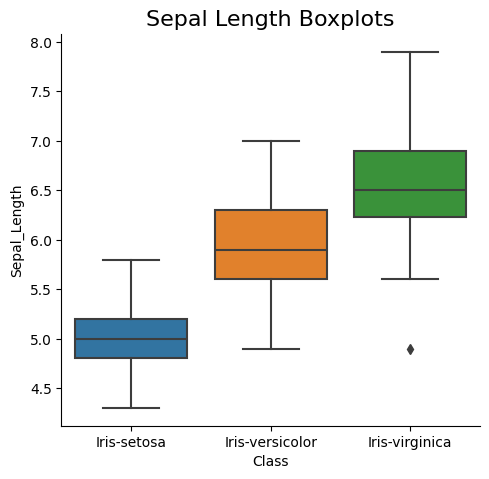

In [12]:
# plot an individual plot for Sepal Length
# plotting a boxplot using seaborn

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)  # to prevent future warnings error from displaying
# https://stackoverflow.com/questions/15777951/how-to-suppress-pandas-future-warning
y = sns.catplot(data=iris, x="Class", y="Sepal_Length", kind="box")
plt.title('Sepal Length Boxplots', fontsize=16)
y.fig.subplots_adjust(top=.90); # to adust the plot so the title is legible

### Swarm Plots

Swarm plots are useful for visualising the distribution of the variable. This particular plot uses an algorithm that prevents the data from overlapping, thus giving a better representation of the distribution of the data. [[12]](#12)

I plotted the data for sepal width on a swarm plot. The plot below indicated that the Iris-versicolor class has the smallest sepal widths, while the Iris-setosa class has the largest sepal widths.

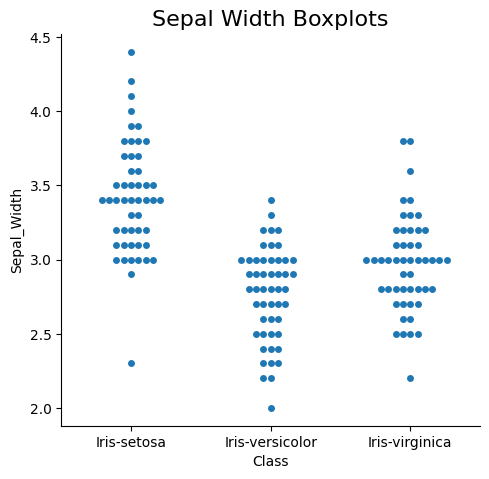

In [13]:
# plot a swarm plot for Sepal Width
z = sns.catplot(data=iris, x="Class", y="Sepal_Width", kind="swarm")
plt.title('Sepal Width Boxplots', fontsize=16)
z.fig.subplots_adjust(top=.90);
# https://github.com/mwaskom/seaborn/issues/2072

### Violin Plots

Violin plots are similar to histograms and box plots in that they demonstrate the probability distribution of the data. Rather than showing counts of data points that fall into bins or order statistics, violin plots use kernel density estimation (KDE) to compute an empirical distribution of the sample. [[12]](#12)

I used the violin plot to visualise the distribution of the petal length and petal width variables. We can see there is clear distinction between the three classes of Iris plant in terms of petal lengths and widths.

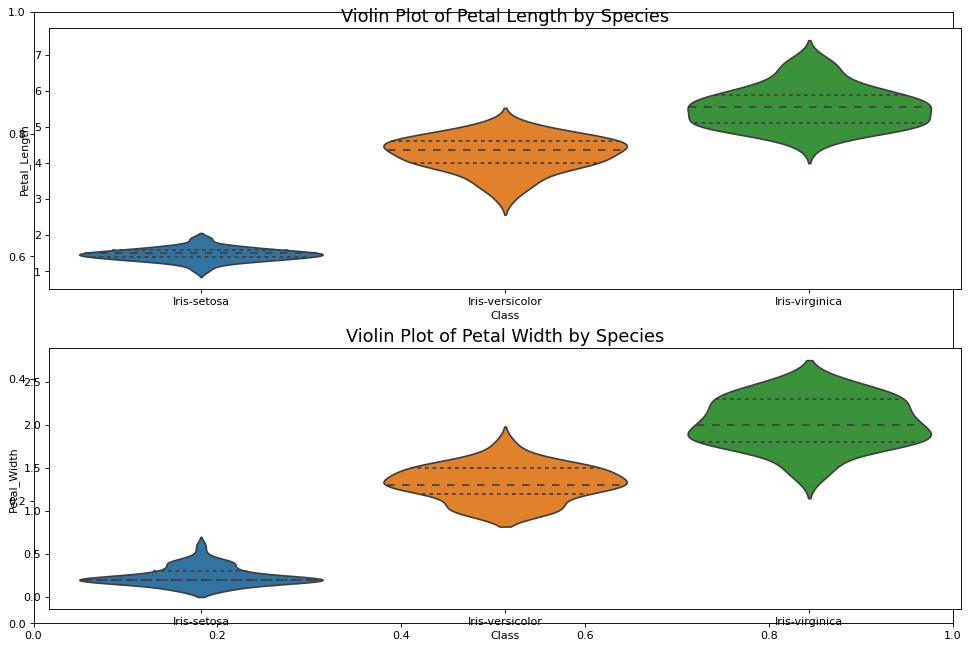

In [14]:
# to plot a violin plot for Petal Length
fig, ax = plt.subplots(figsize=(12,8), dpi= 80, constrained_layout=True)
ax = fig.add_subplot(211)
sns.violinplot(x='Class', y='Petal_Length', data=iris, scale='width', inner='quartile')
plt.title('Violin Plot of Petal Length by Species', fontsize=16)

# to plot a violin plot for Petal Width
ax = fig.add_subplot(212)
sns.violinplot(x='Class', y='Petal_Width', data=iris, scale='width', inner='quartile')
plt.title('Violin Plot of Petal Width by Species', fontsize=16);

### Bar Charts

Bar charts are often used to plot categorical variables. These types of plots visualise the number of observations in each category.

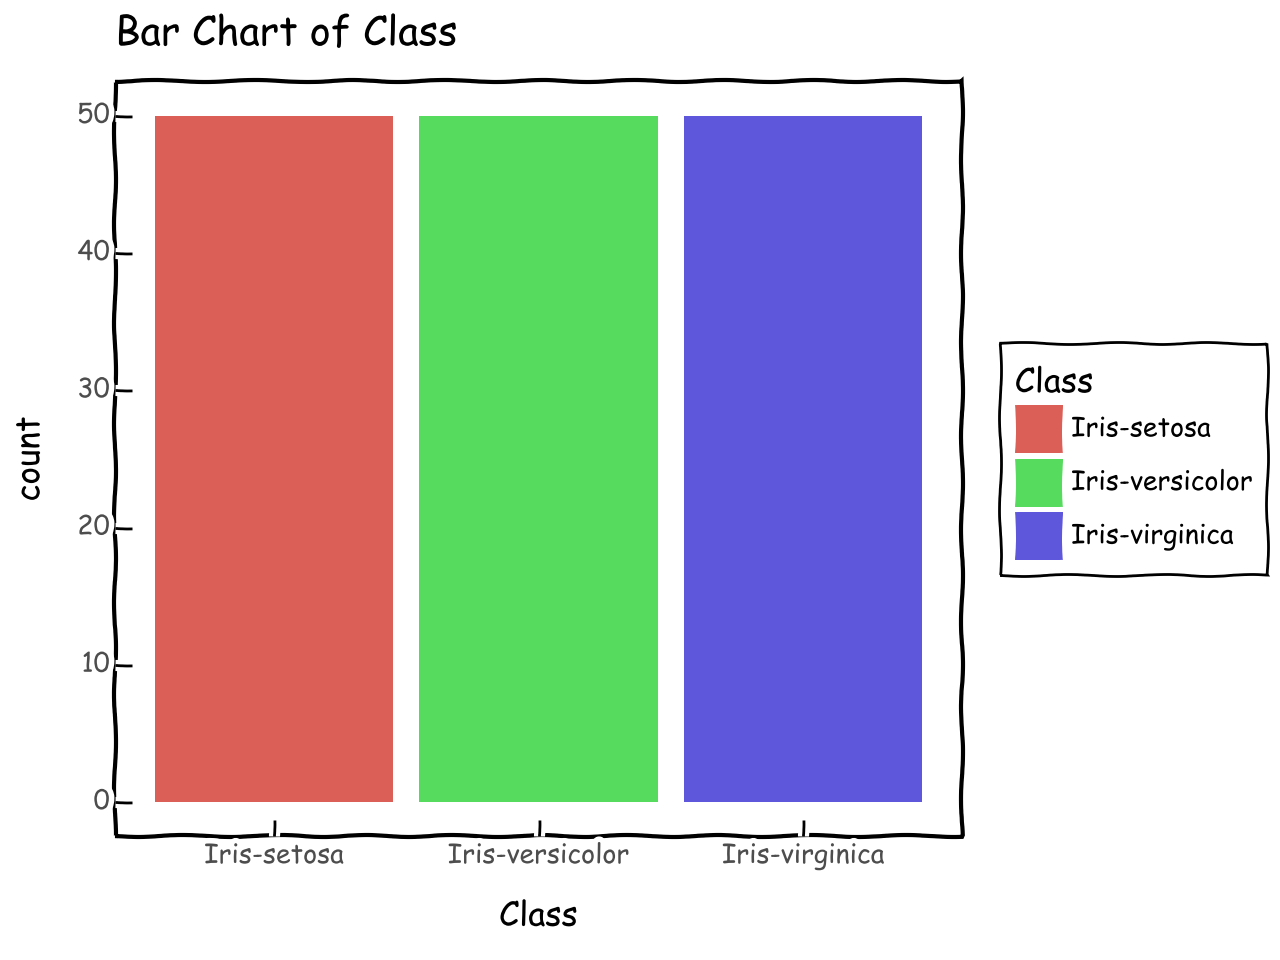

<Figure Size: (640 x 480)>

In [15]:
import logging  # to prevent font errors from displaying
logging.getLogger('matplotlib.font_manager').disabled = True

# to plot a bar chart for the class variable in the xkcd theme
(ggplot(iris) + aes(x="Class", fill="Class") + geom_bar() + theme_xkcd() + labs(title="Bar Chart of Class"))

## Correlation Plots Displaying Relationships Between the Variables

Correlation between the variables can be demonstrated in a number of different ways.

I am going to use scatter plots and pairplots to visually describe the correlation between the four measuring variables in the Iris datset

- ### Scatter Plots

Scatter plots were created for each pair of variables (Sepal Length vs Sepal Width and Petal Length vs Petal Width).

Scatter plots show the relationship between two variables, which allow viewers to easily identify any trends.

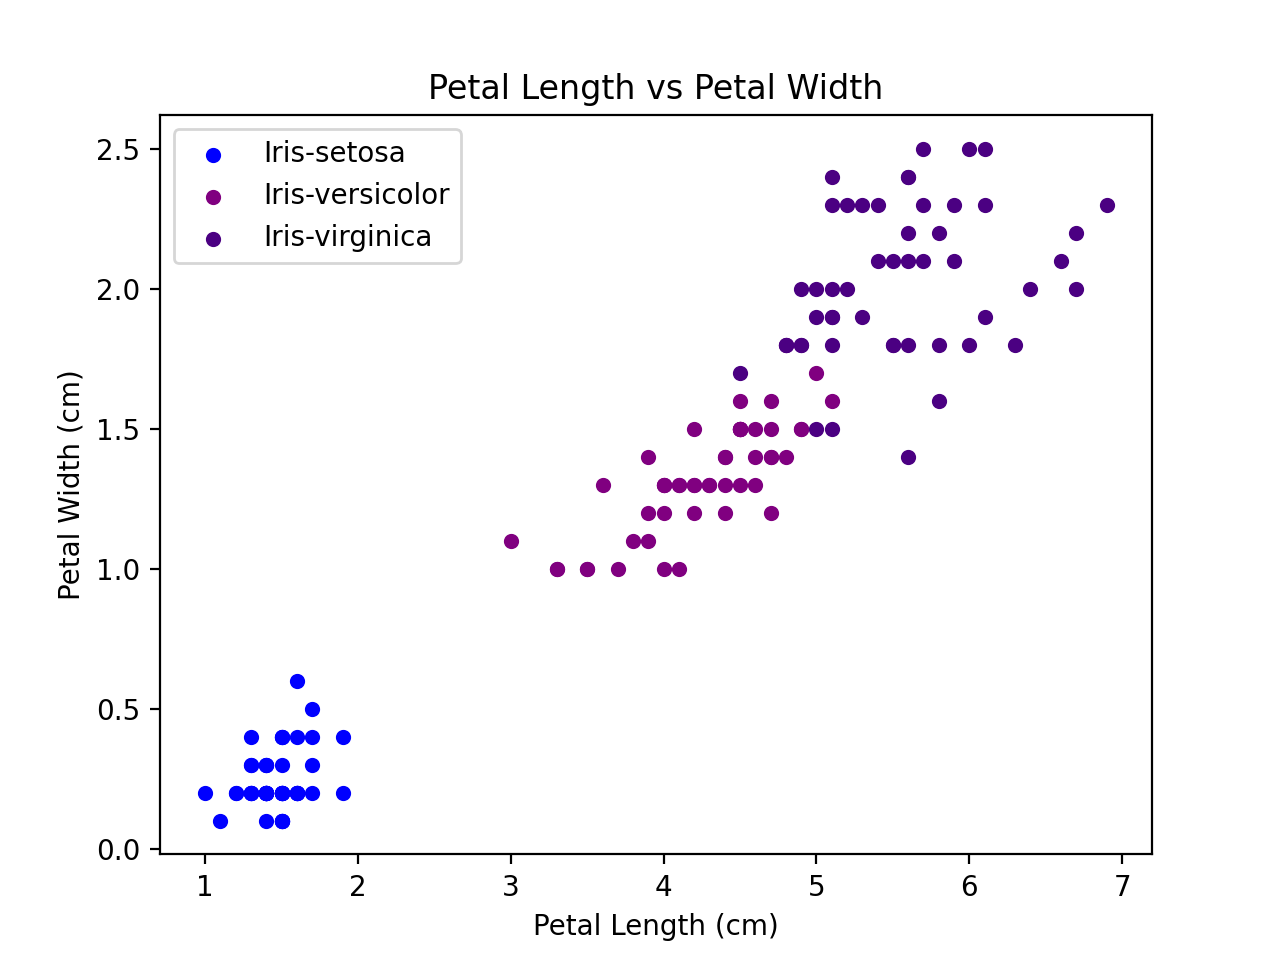

In [16]:
# Petal Length vs Petal Width
# https://www.geeksforgeeks.org/exploratory-data-analysis-on-iris-dataset/
fig, ax = plt.subplots()
colors = {'Iris-setosa': 'blue', 'Iris-versicolor': 'purple' , 
            'Iris-virginica': 'indigo'}

# to group the data by class/species
grouped = iris.groupby('Class')
for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='Petal_Length', y='Petal_Width', label=key, color=colors[key])

plt.title("Petal Length vs Petal Width")
plt.legend()
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()

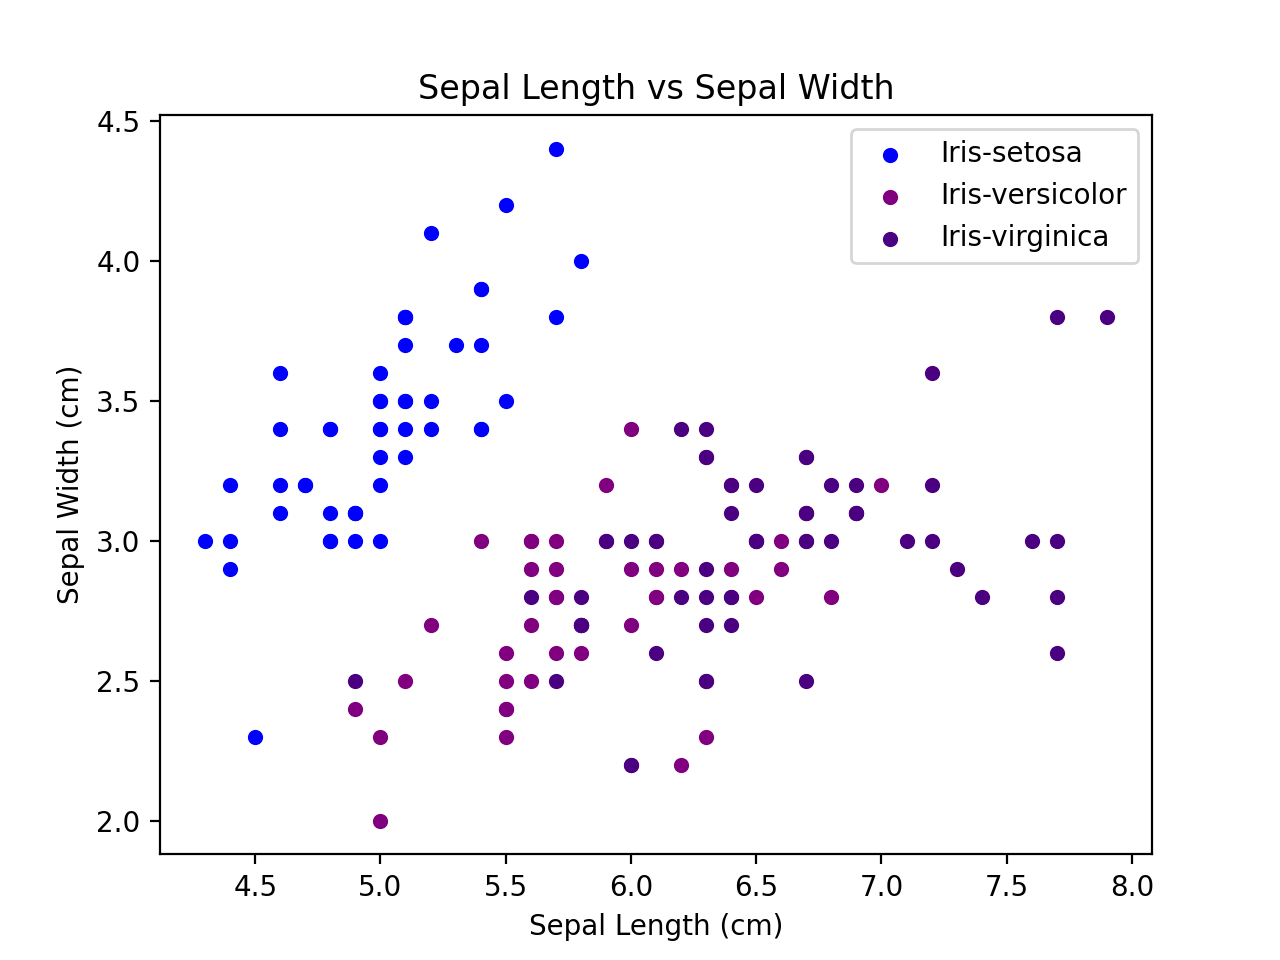

In [17]:
# Sepal Length vs Sepal Width

fig, ax = plt.subplots()
colors = {'Iris-setosa': 'blue', 'Iris-versicolor': 'purple' , 
            'Iris-virginica': 'indigo'}

grouped = iris.groupby('Class')
for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='Sepal_Length', y='Sepal_Width', label=key, color=colors[key])

plt.title("Sepal Length vs Sepal Width")
plt.legend()
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

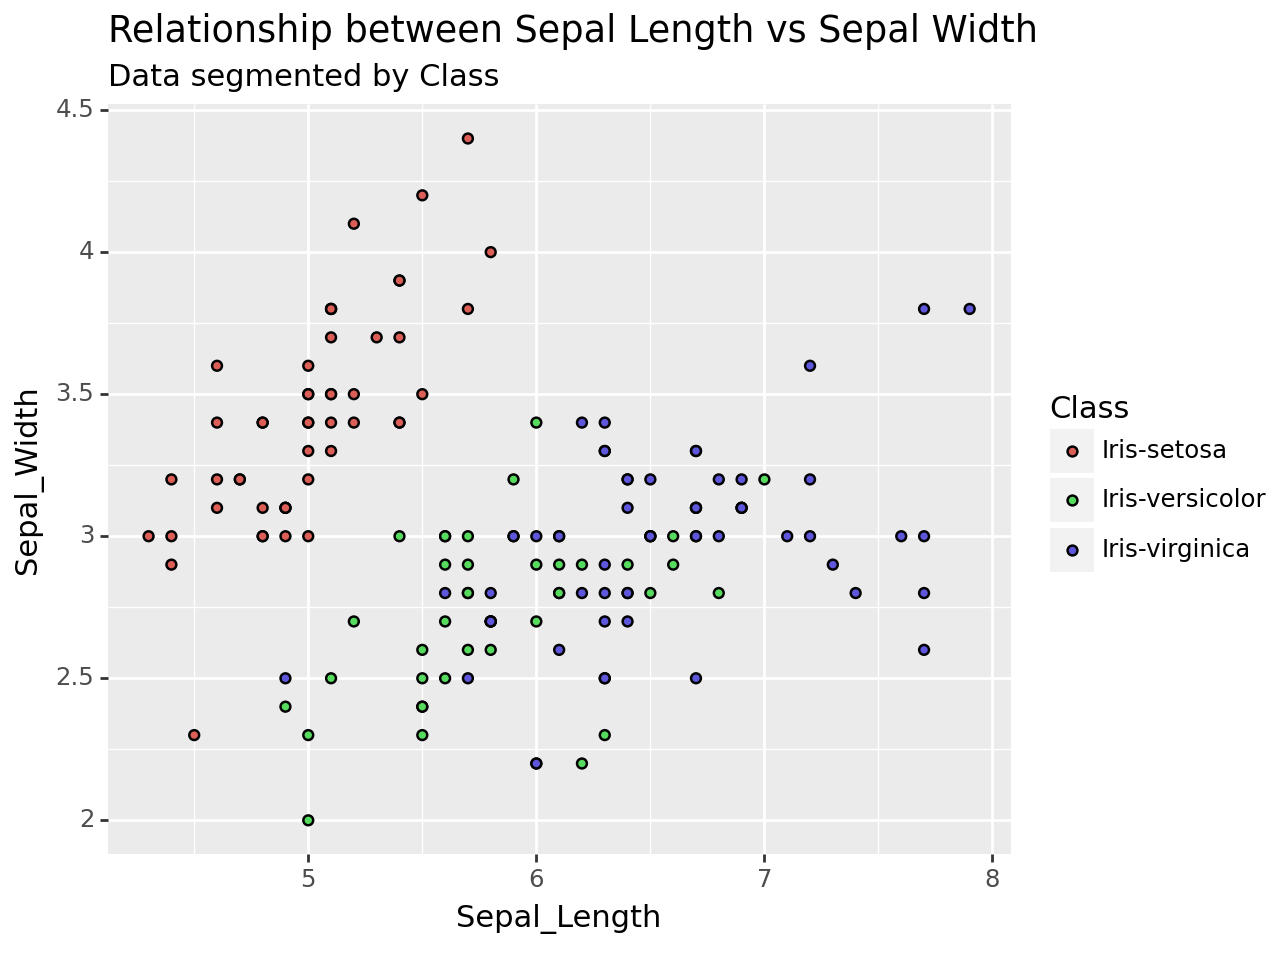

<Figure Size: (640 x 480)>

In [18]:
# scatter plot of Sepal Length vs Sepal Width
# to create a scatter plot to visualize the variables using ggplot
# https://r.qcbs.ca/workshop03/book-en/the-basics-of-visualizing-data.html
(ggplot(data = iris) + aes(x = "Sepal_Length", y = "Sepal_Width", fill="Class") + geom_point() + labs(title = "Relationship between Sepal Length vs Sepal Width",
subtitle ="Data segmented by Class"))

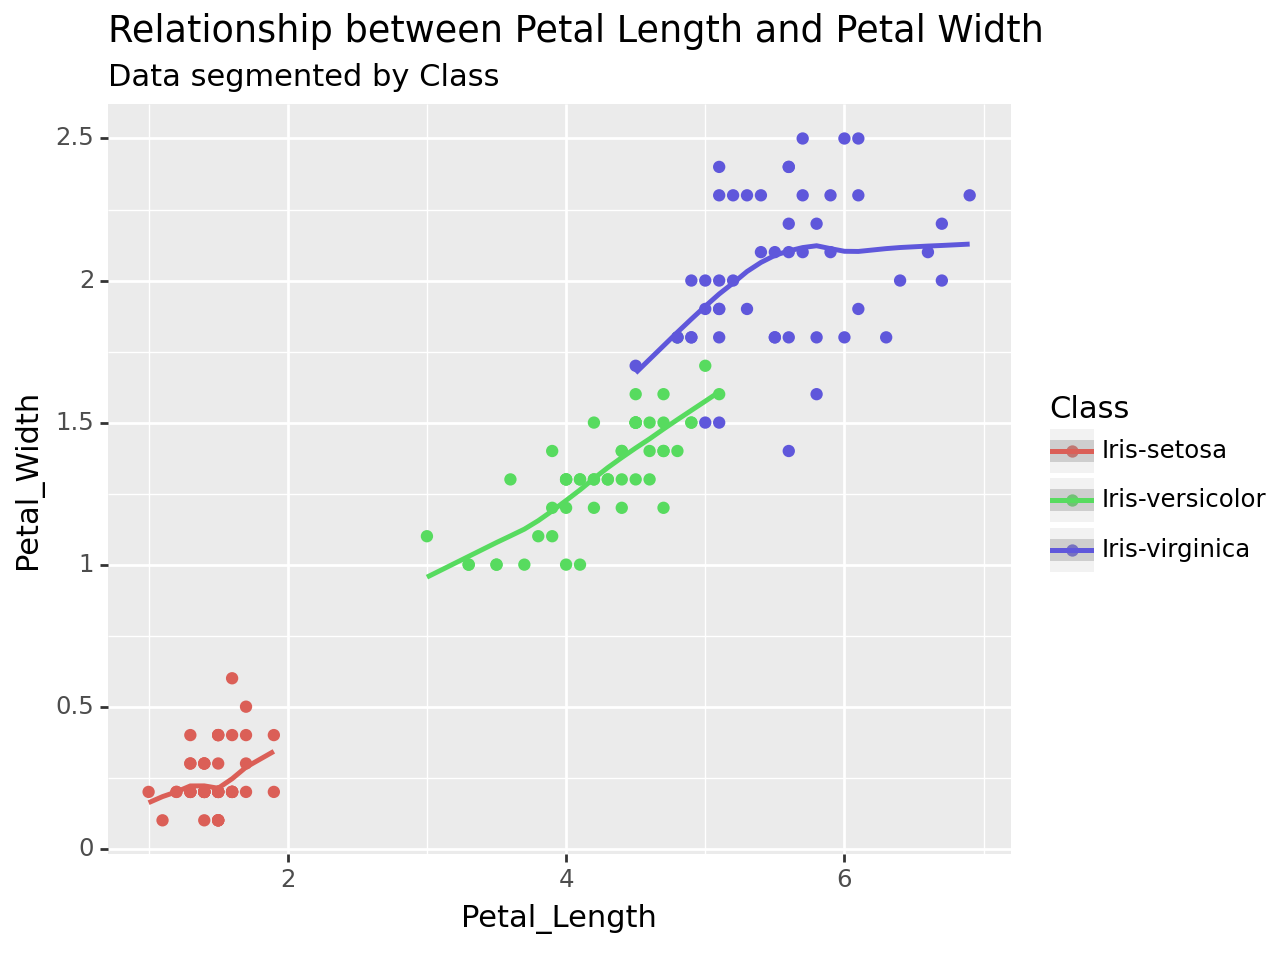

<Figure Size: (640 x 480)>

In [19]:
# plot Petal Length and Petal Width using ggplot
# https://medium.com/@Fortune_/visualizing-the-palmerpenguins-dataset-d3d70bb619b4

import warnings
warnings.filterwarnings('ignore')
(ggplot(data = iris)+

geom_point(mapping = aes(x="Petal_Length", y = "Petal_Width", colour="Class"))+

geom_smooth(mapping = aes(x="Petal_Length", y = "Petal_Width", colour="Class"))+

labs(title = "Relationship between Petal Length and Petal Width",

subtitle ="Data segmented by Class"))

From the scatter plots above, it is clear the Setosa species is independent and lineary separable from the other two species, Versicolor and Virginica.

Comparing the two petal variables, there is a clear positive correlation between petal length and petal width - in that the flowers with the smallest petal lengths have the smallest petal widths and vice versa. The opposite is true for the sepal variables. Although not as strong a correlation, there is a slight negative correlation between sepal lengths and sepal widths.

- ### Pair Plots

Pair plots were created to, again, show the relationship between the variables and display trends.

Pairplots were created using the Seaborn module. As there are four variables in the Iris dataset, three scatter plots are created for each variable (12 in total) and one distribution plot for each variable (4 in total). Overall, 16 plots were created and displayed as subplots in a 4x4 format.

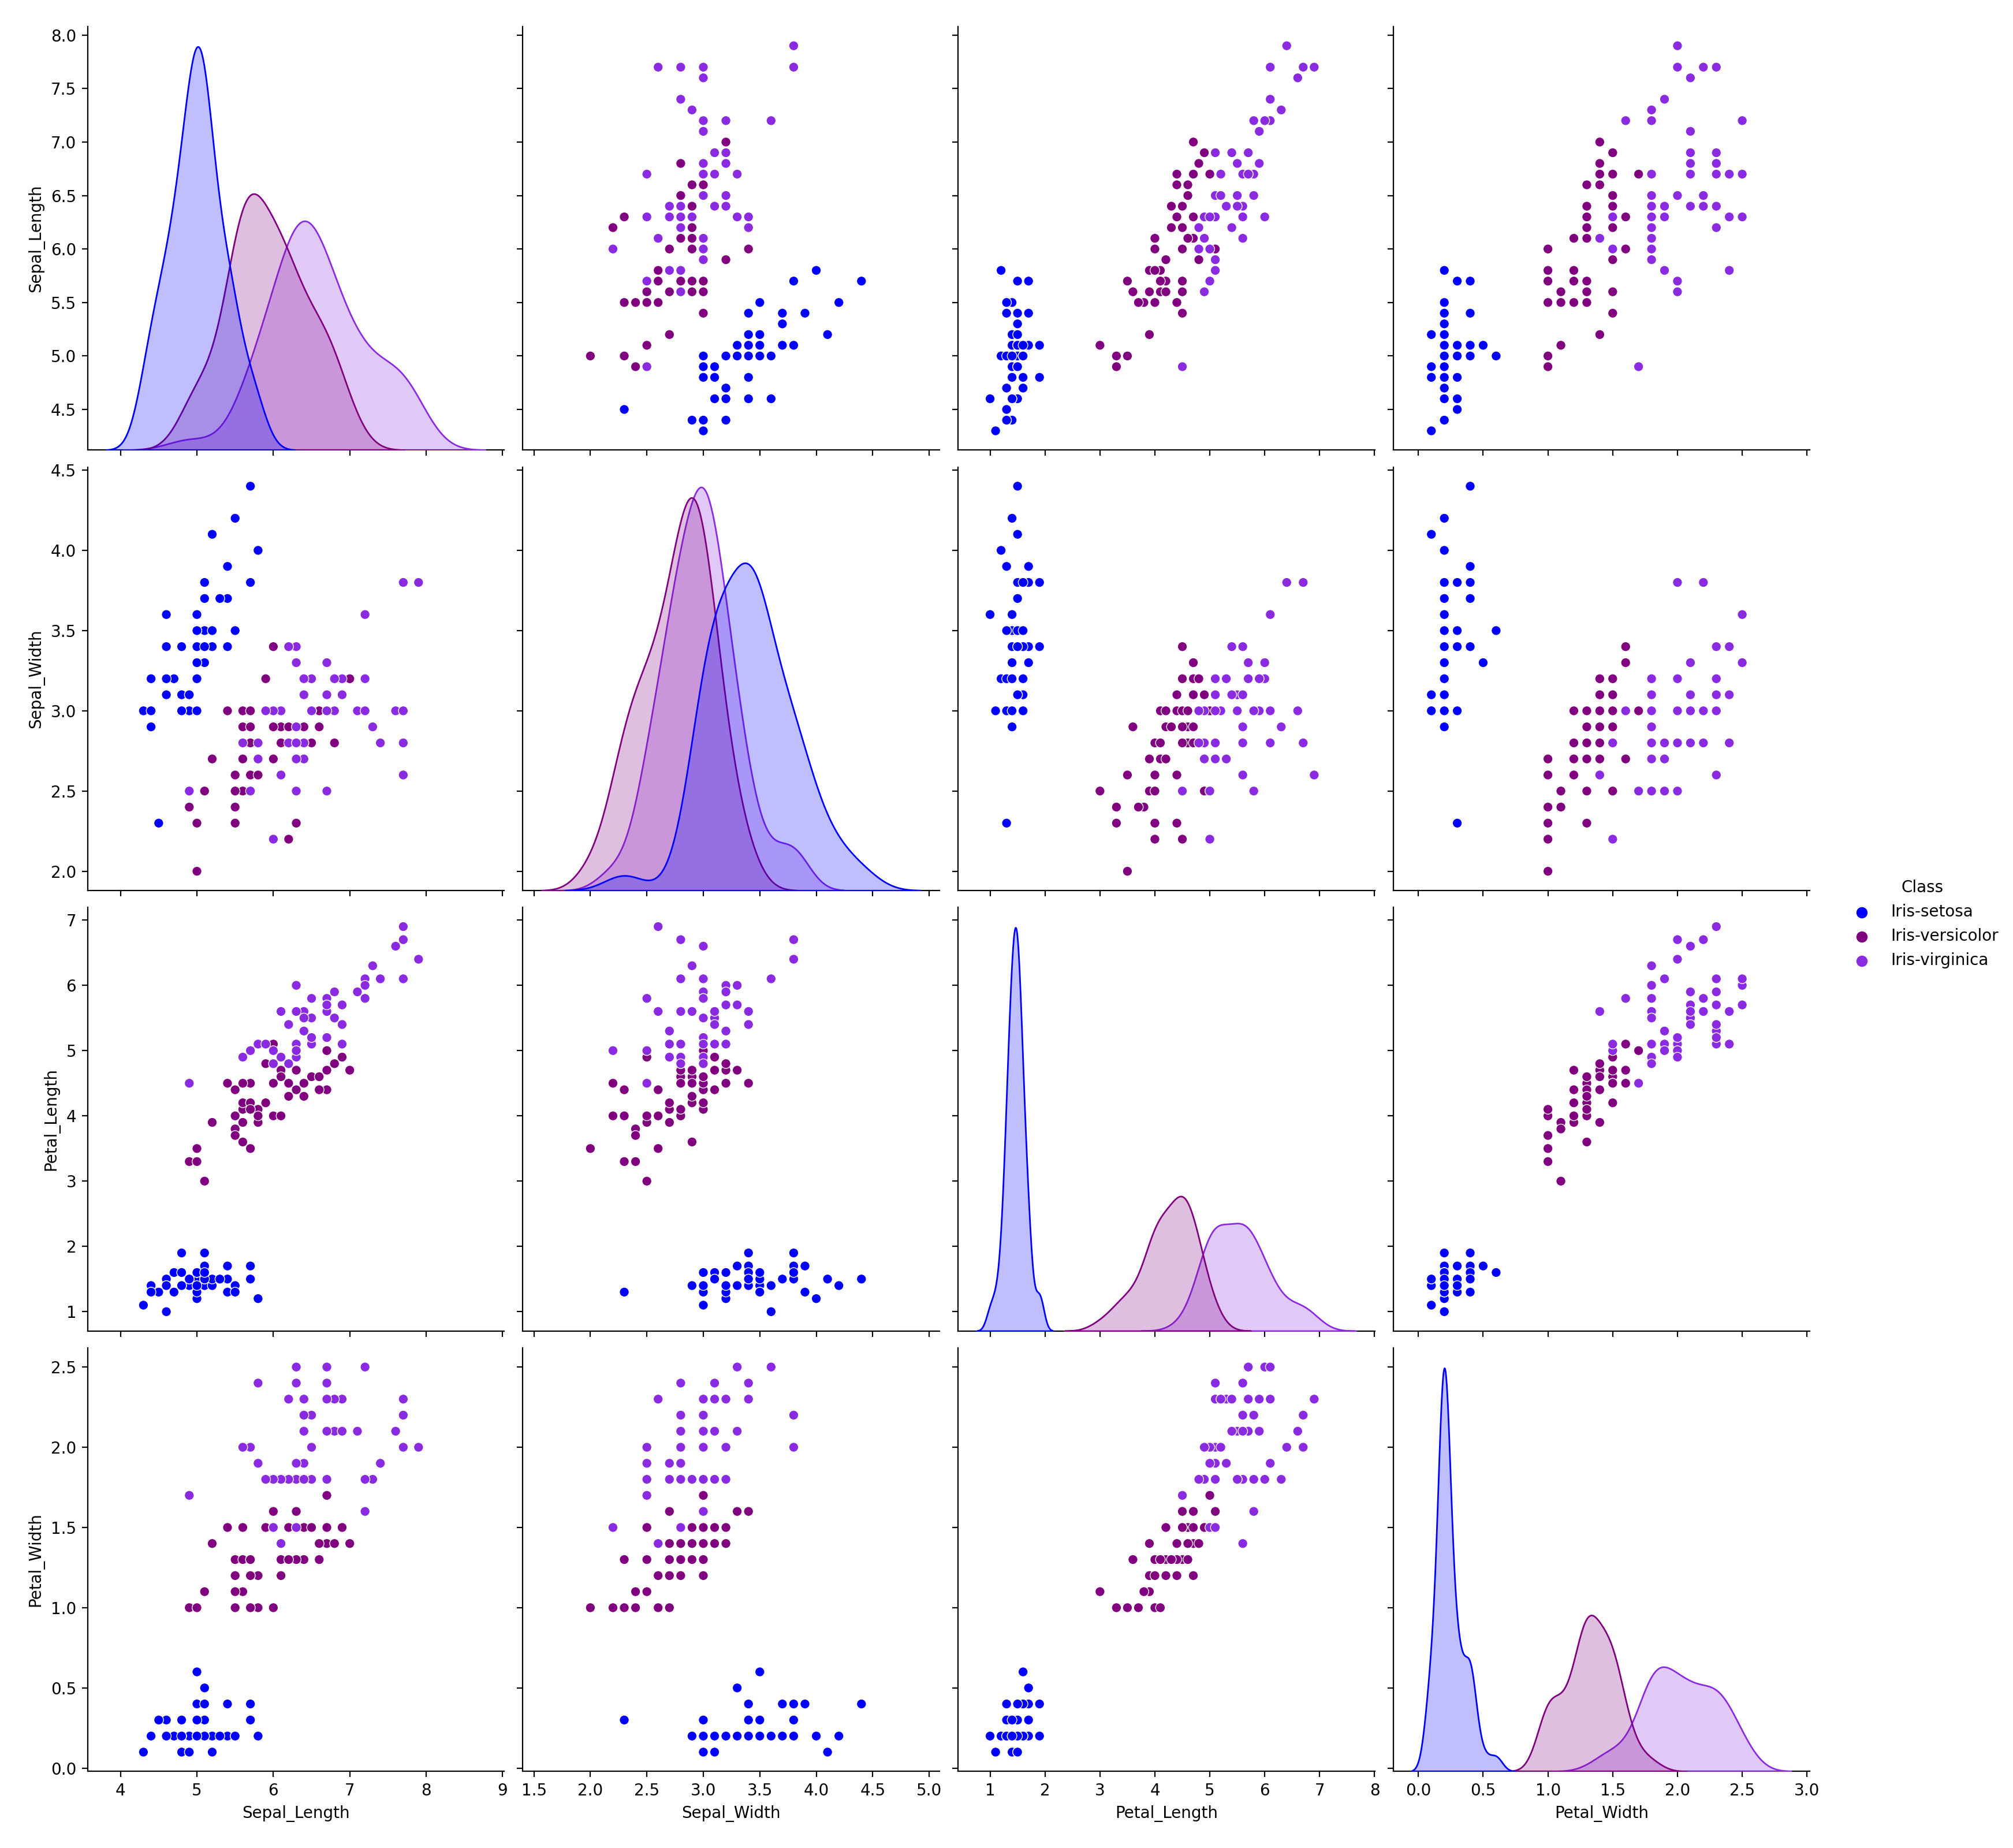

In [20]:
# to plot pair plots of each pair of variables using seaborn
# https://medium.com/analytics-vidhya/exploratory-data-analysis-iris-dataset-4df6f045cda#:~:text=Data%20Insights%3A,-The%20pdf%20curve&text=If%20petal%20length%20%3C%202
sns.pairplot(iris, hue = "Class", height=4, palette=['blue', 'purple', 'blueviolet']);   # to create a pairplot to compare each variable with each other

Comparing each pair of variables as displayed in the above Pairplots gives great insight into the relationships between the variables.

As mentioned above from the scatter plot analysis, the positive correlation can be seen between petal widths and petal lengths. Similarly, petal width has a positive correlation with sepal length, in that the smallest petal lengths have the smallest sepal lengths and vice versa. This positive correlation can also be seen between sepal and petal lengths.

## Discussion

>The Iris dataset is one of the most famous datasets available. It is extremely useful as a learning tool in the area of data analytics. For this reason, it has been widely researched and analysed.

>My analysis focused on a number of areas:

- Classifying the variables
- Determining relevant summary statistics for each variable
- Plotting each variable using appropriate individual plots as well as correlation plots to compare two or more of the variables

>The analysis showed that the Setosa species is linearly separable from the other two species, Virginica and Versicolor. This is clearly visible in the pair plots above. 
The analysis also provided inference on the distribution of the variables, in particular that the sepal width variable appears quite normally distributed.

>Correlation between the variables was also determined using both the correlation function in Pandas (.corr()), as well as using correlation plots such as scatter plots and pairplots. It was determined there is very high positive correlation between the petal variables - the plants with the smallest petal lengths will have the smallest petal widths and vice versa. It also displayed positive correlation between sepal length and both the petal variables - the flowers with the smallest sepal lengths have the smallest petal lengths and widths, and vice versa. Meanwhile, there is a negative correlation between sepal width and the two petal variables - flowers with the largest sepal widths will have the smallest petal characteristics.

> From research, another interesting aspect of analysis that can be performed on the dataset is that of predictive analysis. This will give predictions on the species for a given value of a variable. i.e. if petal length is < 2.1, the species is highly likely to be Iris-setosa, if petal length is > 4.8 it's highly likely to be Iris-virginica. From the pairplots, it is clear petal length displays the clearest differentiation between the three species types. Therefore, petal length is a good variable to choose when performing this analysis. [[14]](#14) Scikit-learn is used to perform predictive analysis also, again where the species type can be predicted when values for each variable are chosen. [[15]](#15)

## References

<a id="1">[1]</a>
(Angela1c [2021](https://www.angela1c.com/projects/iris_project/the-iris-dataset/))

<a id="2">[2]</a>
(W3schools.com [n.d.](https://www.w3schools.com/python/pandas/pandas_intro.asp))

<a id="3">[3]</a>
(W3schools.com [n.d.](https://www.w3schools.com/python/numpy/numpy_intro.asp))

<a id="4">[4]</a>
(W3schools.com [n.d.](https://www.w3schools.com/python/matplotlib_intro.asp))

<a id="5">[5]</a>
(Analytics India Mag [2020](https://analyticsindiamag.com/beginners-guide-to-tabulate-python-tool-for-creating-nicely-formatted-tables/#:~:text=Tabulate%20is%20an%20open%2Dsource,downloaded%20in%20multiple%20output%20formats))

<a id="6">[6]</a>
(Seaborn.pydata.org [2012](https://seaborn.pydata.org/))

<a id="7">[7]</a>
(GeeksForGeeks.com [n.d.](https://www.geeksforgeeks.org/python-sys-module/))

<a id="8">[8]</a>
(Plotnine.readthedocs.io [n.d.](https://plotnine.readthedocs.io/en/v0.12.4/))

<a id="9">[9]</a>
(Scribbr.com [2022](https://www.scribbr.com/statistics/skewness/#:~:text=Skewness%20is%20a%20measure%20of,negative))

<a id="10">[10]</a>
(Analyticsvidhya.com [2023](https://www.analyticsvidhya.com/blog/2021/05/shape-of-data-skewness-and-kurtosis/#:~:text=If%20the%20skewness%20is%20between,the%20data%20are%20extremely%20skewed))

<a id="11">[11]</a>
(Scribbr.com [2020](https://www.scribbr.com/statistics/normal-distribution/#:~:text=In%20a%20normal%20distribution%2C%20data%20are%20symmetrically%20distributed%20with%20no,same%20in%20a%20normal%20distribution))

<a id="12">[12]</a>
(Seaborn [n.d.](https://seaborn.pydata.org/tutorial/categorical.html))

<a id="13">[13]</a>
(Seaborn.pydata.org [n.d.](https://seaborn.pydata.org/tutorial/categorical.html))

<a id="14">[14]</a>
(Medium.com [2021](https://medium.com/analytics-vidhya/exploratory-data-analysis-iris-dataset-4df6f045cda#:~:text=Data%20Insights%3A,-The%20pdf%20curve&text=If%20petal%20length%20%3C%202))

<a id="15">[15]</a>
(Scalar.com [2023](https://www.scaler.com/topics/machine-learning/iris-dataset-project/))


***

End